##字典型別資料

In [7]:
data = [
    {'price': 850000, 'rooms': 4, 'loc': '大安區'},
    {'price': 700000, 'rooms': 3, 'loc': '信義區'},
    {'price': 650000, 'rooms': 3, 'loc': '文山區'},
    {'price': 600000, 'rooms': 2, 'loc': '萬華區'}
]

In [8]:
from sklearn.feature_extraction import DictVectorizer

In [9]:
vec = DictVectorizer(sparse=False,dtype=int)
data_v = vec.fit_transform(data)
print(data_v)


[[     0      1      0      0 850000      4]
 [     1      0      0      0 700000      3]
 [     0      0      1      0 650000      3]
 [     0      0      0      1 600000      2]]


In [10]:
vec.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['loc=信義區', 'loc=大安區', 'loc=文山區', 'loc=萬華區', 'price', 'rooms']

In [11]:
vec_s = DictVectorizer(sparse=True,dtype=int)
data_v_s = vec_s.fit_transform(data)
print(data_v_s)


  (0, 1)	1
  (0, 4)	850000
  (0, 5)	4
  (1, 0)	1
  (1, 4)	700000
  (1, 5)	3
  (2, 2)	1
  (2, 4)	650000
  (2, 5)	3
  (3, 3)	1
  (3, 4)	600000
  (3, 5)	2


In [12]:
data_raw = vec_s.inverse_transform(data_v_s)
print(data_raw)

[{'loc=大安區': 1, 'price': 850000, 'rooms': 4}, {'loc=信義區': 1, 'price': 700000, 'rooms': 3}, {'loc=文山區': 1, 'price': 650000, 'rooms': 3}, {'loc=萬華區': 1, 'price': 600000, 'rooms': 2}]


##數值型別資料

In [17]:
    x = [[0., 0., 5., 13., 9., 1.],
    [0., 0., 13., 15., 10., 15.],
    [0., 3., 15., 2., 0., 11.]
    ]

In [18]:
import numpy as np
X = np.array(x)
X

array([[ 0.,  0.,  5., 13.,  9.,  1.],
       [ 0.,  0., 13., 15., 10., 15.],
       [ 0.,  3., 15.,  2.,  0., 11.]])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)  #

[[ 0.         -0.70710678 -1.38873015  0.52489066  0.59299945 -1.35873244]
 [ 0.         -0.70710678  0.46291005  0.87481777  0.81537425  1.01904933]
 [ 0.          1.41421356  0.9258201  -1.39970842 -1.4083737   0.33968311]]


In [23]:
!pip install git+https://github.com/pydata/pandas-datareader.git

  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-xnaok0l1
  Running command git clone -q https://github.com/pydata/pandas-datareader.git /tmp/pip-req-build-xnaok0l1


In [22]:
!pip install pandas --upgrade
!pip install pandas-datareader --upgrade 

In [27]:
import pandas_datareader as pdr
stock = pdr.get_data_yahoo("2330.TW")
stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-12,191.5,190.0,190.5,191.0,17283000.0,161.718887
2017-04-13,192.0,189.5,189.5,191.5,14771000.0,162.142273
2017-04-14,189.5,188.0,189.5,189.0,30701000.0,160.025513
2017-04-17,189.0,187.5,189.0,187.5,17096000.0,158.755478
2017-04-18,189.5,187.5,188.0,188.0,25063000.0,159.178818
...,...,...,...,...,...,...
2022-04-01,589.0,584.0,585.0,589.0,29732696.0,589.000000
2022-04-06,580.0,575.0,578.0,578.0,37645873.0,578.000000
2022-04-07,573.0,566.0,571.0,566.0,42904743.0,566.000000


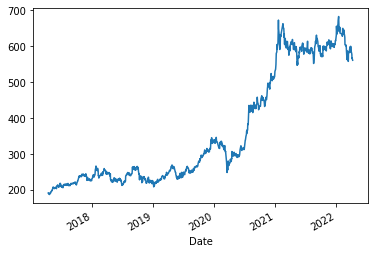

In [29]:
import matplotlib.pyplot as plt
stock["Close"].plot()

In [30]:
stock_c = stock.reset_index(drop=True)
stock_c

,High,Low,Open,Close,Volume,Adj Close
0,191.5,190.0,190.5,191.0,17283000.0,161.718887
1,192.0,189.5,189.5,191.5,14771000.0,162.142273
2,189.5,188.0,189.5,189.0,30701000.0,160.025513
3,189.0,187.5,189.0,187.5,17096000.0,158.755478
4,189.5,187.5,188.0,188.0,25063000.0,159.178818
...,...,...,...,...,...,...
1212,589.0,584.0,585.0,589.0,29732696.0,589.000000
1213,580.0,575.0,578.0,578.0,37645873.0,578.000000
1214,573.0,566.0,571.0,566.0,42904743.0,566.000000
1215,570.0,566.0,567.0,567.0,28024587.0,567.000000


In [32]:
scaler = StandardScaler().fit(stock_c)
stock_nor = scaler.transform(stock_c)
stock_nor

array([[-1.08203168, -1.07449446, -1.0799771 , -1.07725919, -0.89406324,
        -1.10143842],
       [-1.07884363, -1.07773426, -1.08639547, -1.07404572, -1.02007301,
        -1.09883551],
       [-1.09478387, -1.08745367, -1.08639547, -1.09011303, -0.2209744 ,
        -1.11184903],
       ...,
       [ 1.3504485 ,  1.36183879,  1.36221415,  1.33283624,  0.39120351,
         1.38401996],
       [ 1.33132022,  1.36183879,  1.33654065,  1.33926316, -0.35523164,
         1.39016781],
       [ 1.30581584,  1.32296113,  1.31086715,  1.30070163, -1.01252747,
         1.35328073]])

In [33]:
import pandas as pd
stock_nor_df = pd.DataFrame(stock_nor)
stock_nor_df

,0,1,2,3,4,5
0,-1.082032,-1.074494,-1.079977,-1.077259,-0.894063,-1.101438
1,-1.078844,-1.077734,-1.086395,-1.074046,-1.020073,-1.098836
2,-1.094784,-1.087454,-1.086395,-1.090113,-0.220974,-1.111849
3,-1.097972,-1.090693,-1.089605,-1.099753,-0.903444,-1.119657
4,-1.094784,-1.090693,-1.096023,-1.096540,-0.503794,-1.117054
...,...,...,...,...,...,...
1212,1.452466,1.478472,1.452071,1.480655,-0.269548,1.525420
1213,1.395081,1.420155,1.407143,1.409959,0.127402,1.457794
1214,1.350449,1.361839,1.362214,1.332836,0.391204,1.384020
1215,1.331320,1.361839,1.336541,1.339263,-0.355232,1.390168


##文字型別資料

In [42]:
eng_corpus = []
while True:
  s = input("輸入英文(y=結束):")
  if s == "y":
    break
  else:
    eng_corpus.append(s)
print(eng_corpus)


輸入英文(y=結束):ergrthjykiuky
輸入英文(y=結束):tyasfdfjhityujt
輸入英文(y=結束):y
['ergrthjykiuky', 'tyasfdfjhityujt']


In [44]:
eng_corpus

['ergrthjykiuky', 'tyasfdfjhityujt']

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
eng_v = cv.fit_transform(eng_corpus)
print(eng_v)

  (0, 0)	1
  (1, 1)	1


In [47]:
import pandas as pd
pd.DataFrame(eng_v.toarray(), columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ergrthjykiuky,tyasfdfjhityujt
0,1,0
1,0,1


In [48]:
import jieba

In [49]:
t = jieba.cut("我是一個好的程式設計師")
print("/".join(t))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.423 seconds.
Prefix dict has been built successfully.


我/是/一個/好/的/程式/設計師


In [50]:
chn_corpus = []
while True:
  s = input("輸入中文(y=結束): ")
  if s == "y" :
    break
  else :
    t = jieba.cut(s)
    chn_corpus.append(" ".join(t))

輸入中文(y=結束): 今天很殘酷，明天更殘酷，後天很美好，但絕對大部分是死在明天晚上，所以每個人不要放棄今天。
輸入中文(y=結束): 我們看到的從很遠星系來的光是在幾百萬年之前發出的，這樣當我們看到宇宙時，我們是在看它的過去。
輸入中文(y=結束): 如果只用一種方式瞭解某樣事物，你就不會真正瞭解它。瞭解事物真正含義的祕密取決於如何將其與我們所瞭解的事物相聯絡。
輸入中文(y=結束): y


In [52]:
chn_corpus

['今天 很 殘酷 ， 明天 更 殘酷 ， 後 天 很 美好 ， 但絕 對 大部分 是 死 在 明天 晚上 ， 所以 每個 人 不要 放棄 今天 。',
 '我們 看到 的 從 很 遠 星系 來 的 光是在 幾百萬年 之前 發出 的 ， 這樣 當我們 看到 宇宙 時 ， 我們 是 在 看 它 的 過去 。',
 '如果 只用 一種 方式 瞭解 某樣 事物 ， 你 就 不會 真正 瞭解 它 。 瞭解 事物 真正 含義的 祕 密 取決 於 如何 將其 與 我們 所 瞭解 的 事物 相聯絡 。']

In [54]:
chn_v = cv.fit_transform(chn_corpus)
print(chn_v)

  (0, 5)	2
  (0, 25)	2
  (0, 21)	2
  (0, 33)	1
  (0, 6)	1
  (0, 11)	1
  (0, 23)	1
  (0, 18)	1
  (0, 26)	1
  (0, 2)	1
  (0, 19)	1
  (1, 17)	2
  (1, 30)	2
  (1, 22)	1
  (1, 7)	1
  (1, 16)	1
  (1, 3)	1
  (1, 28)	1
  (1, 34)	1
  (1, 27)	1
  (1, 14)	1
  (1, 35)	1
  (2, 17)	1
  (2, 13)	1
  (2, 9)	1
  (2, 0)	1
  (2, 20)	1
  (2, 32)	4
  (2, 24)	1
  (2, 4)	3
  (2, 1)	1
  (2, 31)	2
  (2, 10)	1
  (2, 8)	1
  (2, 12)	1
  (2, 15)	1
  (2, 29)	1
